<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [5]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [6]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


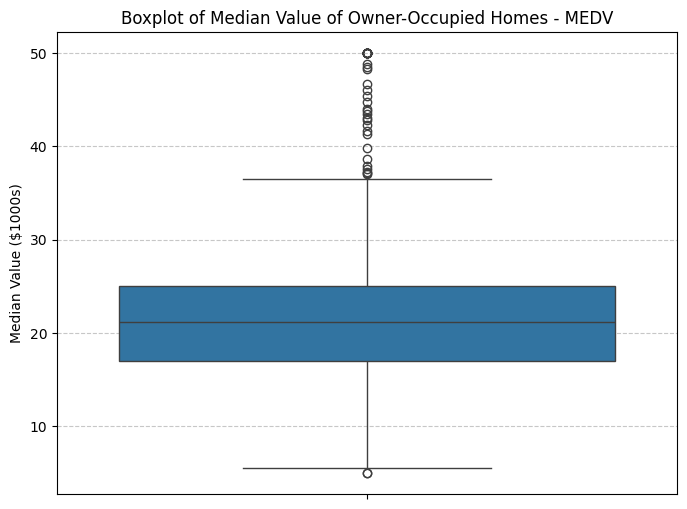

In [9]:
# Task 2: Generate Descriptive Statistics and Visualizations
## 1. Boxplot for Median value of owner-occupied homes - MEDV
pyplot.figure(figsize=(8, 6))
sns.boxplot(y=boston_df['MEDV'])
pyplot.title('Boxplot of Median Value of Owner-Occupied Homes - MEDV')
pyplot.ylabel('Median Value ($1000s)')
pyplot.grid(axis='y', linestyle='--', alpha=0.7)
pyplot.show()

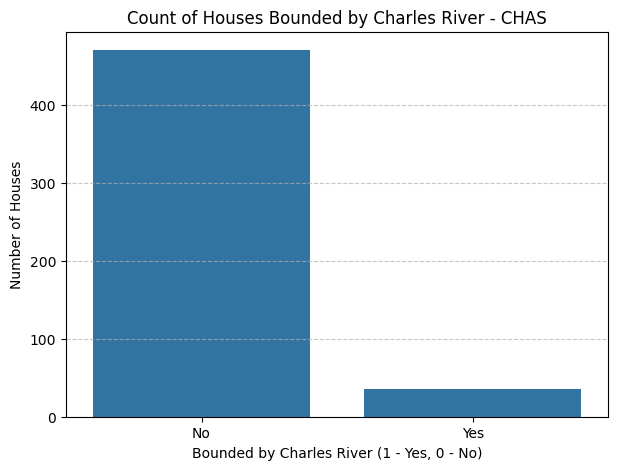

In [11]:
## 2. Bar plot for the Charles River variable - CHAS
pyplot.figure(figsize=(7, 5))
sns.countplot(x=boston_df['CHAS'])
pyplot.title('Count of Houses Bounded by Charles River - CHAS')
pyplot.xlabel('Bounded by Charles River (1 - Yes, 0 - No)')
pyplot.ylabel('Number of Houses')
pyplot.xticks(ticks=[0, 1], labels=['No', 'Yes'])
pyplot.grid(axis='y', linestyle='--', alpha=0.7)
pyplot.show()

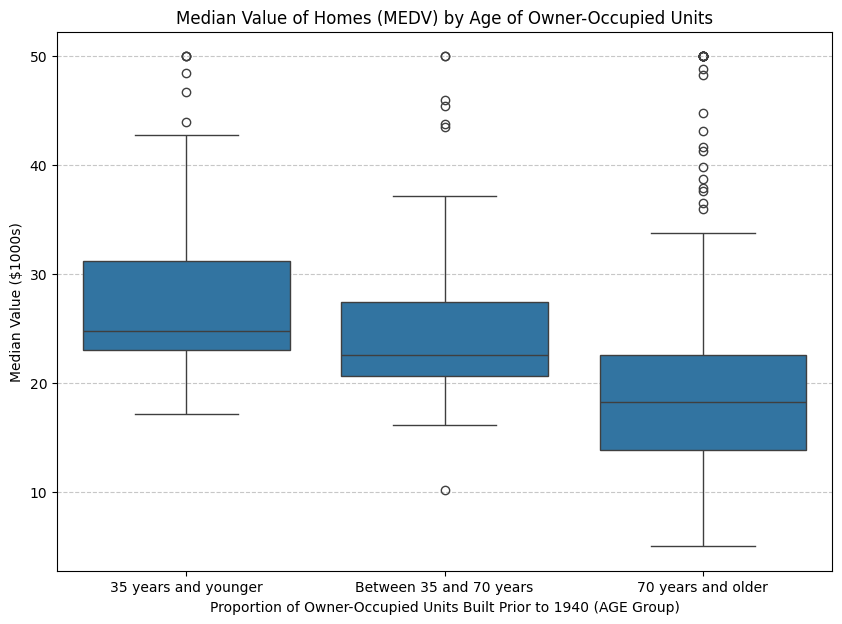

In [12]:
# 3. Boxplot for MEDV vs AGE
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100],
                         labels=['35 years and younger', 'Between 35 and 70 years', '70 years and older'],
                         right=True, include_lowest=True)

pyplot.figure(figsize=(10, 7))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
pyplot.title('Median Value of Homes (MEDV) by Age of Owner-Occupied Units')
pyplot.xlabel('Proportion of Owner-Occupied Units Built Prior to 1940 (AGE Group)')
pyplot.ylabel('Median Value ($1000s)')
pyplot.grid(axis='y', linestyle='--', alpha=0.7)
pyplot.show()

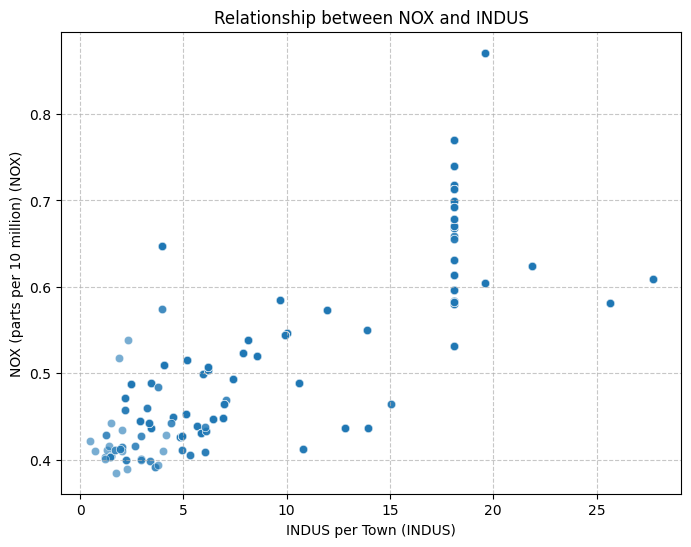

There exists a positive correlation between INDUS and NOX wherein as the proportion of INDUS increases, NOX concentrations tend to increase.


In [14]:
# 4. Scatter plot for NOX vs INDUS
pyplot.figure(figsize=(8, 6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df, alpha=0.6)
pyplot.title('Relationship between NOX and INDUS')
pyplot.xlabel('INDUS per Town (INDUS)')
pyplot.ylabel('NOX (parts per 10 million) (NOX)')
pyplot.grid(True, linestyle='--', alpha=0.7)
pyplot.show()
print("There exists a positive correlation between INDUS and NOX wherein as the proportion of INDUS increases, NOX concentrations tend to increase.")

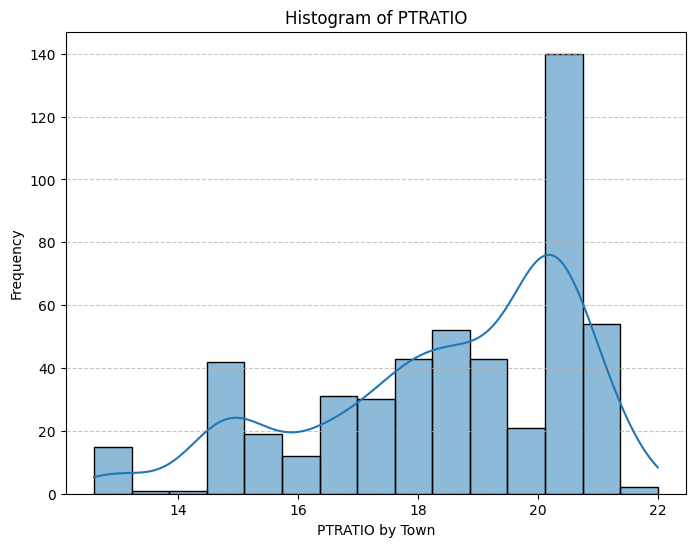

In [15]:
# 5. Histogram for PTRATIO
pyplot.figure(figsize=(8, 6))
sns.histplot(boston_df['PTRATIO'], bins=15, kde=True)
pyplot.title('Histogram of PTRATIO')
pyplot.xlabel('PTRATIO by Town')
pyplot.ylabel('Frequency')
pyplot.grid(axis='y', linestyle='--', alpha=0.7)
pyplot.show()

In [21]:
# Task 3: Use the appropriate tests to answer the questions provided
## Question 1: Is there a significant difference in median value of houses bounded by the Charles river or not?

alpha = 0.05 # Significance level

# Hypothesis:
# H0: There is no significant difference in the median value of houses bounded by the Charles River (CHAS=1) and those not bounded (CHAS=0). (μ1 = μ0)
# H1: There is a significant difference in the median value of houses bounded by the Charles River (CHAS=1) and those not bounded (CHAS=0). (μ1 ≠ μ0)

# Separate data for houses bounded and not bounded by the Charles River
medv_chas1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
medv_chas0 = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(medv_chas1, medv_chas0)

print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print(f"  Conclusion: Since the p-value ({p_value:.4f}) is less than alpha ({alpha}), we reject the null hypothesis.")
    print("  There is a significant difference in the median value of houses bounded by the Charles River and those not bounded.")
else:
    print(f"  Conclusion: Since the p-value ({p_value:.4f}) is greater than or equal to alpha ({alpha}), we fail to reject the null hypothesis.")
    print("  There is no significant difference in the median value of houses bounded by the Charles River and those not bounded.")


T-statistic: 3.9964
P-value: 0.0001
  Conclusion: Since the p-value (0.0001) is less than alpha (0.05), we reject the null hypothesis.
  There is a significant difference in the median value of houses bounded by the Charles River and those not bounded.


In [22]:
## Question 2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

# Hypothesis:
# H0: The mean median value of houses (MEDV) is the same across all age groups (35 years and younger, between 35 and 70 years, 70 years and older). (μ_young = μ_mid = μ_old)
# H1: At least one mean median value of houses (MEDV) is different across the age groups. (Not all μ are equal)

# Get MEDV for each age group
medv_group1 = boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV']
medv_group2 = boston_df[boston_df['AGE_GROUP'] == 'Between 35 and 70 years']['MEDV']
medv_group3 = boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV']

# Perform ANOVA test
f_statistic, p_value = stats.f_oneway(medv_group1, medv_group2, medv_group3)

print(f"  F-statistic: {f_statistic:.4f}")
print(f"  P-value: {p_value:.4f}")

if p_value < alpha:
    print(f"  Conclusion: Since the p-value ({p_value:.4f}) is less than alpha ({alpha}), we reject the null hypothesis.")
    print("  There is a significant difference in the median values of houses across the different age groups of owner-occupied units built prior to 1940.")
else:
    print(f"  Conclusion: Since the p-value ({p_value:.4f}) is greater than or equal to alpha ({alpha}), we fail to reject the null hypothesis.")
    print("  There is no significant difference in the median values of houses across the different age groups of owner-occupied units built prior to 1940.")


  F-statistic: 36.4076
  P-value: 0.0000
  Conclusion: Since the p-value (0.0000) is less than alpha (0.05), we reject the null hypothesis.
  There is a significant difference in the median values of houses across the different age groups of owner-occupied units built prior to 1940.


In [24]:
## Question 3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? 

# Hypothesis:
# H0: There is no linear relationship between Nitric oxide concentrations (NOX) and proportion of non-retail business acres per town (INDUS). (ρ = 0)
# H1: There is a linear relationship between Nitric oxide concentrations (NOX) and proportion of non-retail business acres per town (INDUS). (ρ ≠ 0)

# Perform Pearson correlation test
correlation_coefficient, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(f"  Pearson Correlation Coefficient: {correlation_coefficient:.4f}")
print(f"  P-value: {p_value:.4f}")

if p_value < alpha:
    print(f"  Conclusion: Since the p-value ({p_value:.4f}) is less than alpha ({alpha}), we reject the null hypothesis.")
    print("  We conclude that there is a significant linear relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.")
else:
    print(f"  Conclusion: Since the p-value ({p_value:.4f}) is greater than or equal to alpha ({alpha}), we fail to reject the null hypothesis.")
    print("  We conclude that there is no significant linear relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.")

  Pearson Correlation Coefficient: 0.7637
  P-value: 0.0000
  Conclusion: Since the p-value (0.0000) is less than alpha (0.05), we reject the null hypothesis.
  We conclude that there is a significant linear relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.


In [28]:
## Question 4: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

# Hypothesis:
# H0: The weighted distance to employment centres (DIS) has no linear impact on the median value of owner-occupied homes (MEDV). (β_DIS = 0)
# H1: The weighted distance to employment centres (DIS) has a linear impact on the median value of owner-occupied homes (MEDV). (β_DIS ≠ 0)

# Perform simple linear regression
# The formula 'MEDV ~ DIS' means MEDV is the dependent variable and DIS is the independent variable
model = ols('MEDV ~ DIS', data=boston_df).fit()

print("  Regression Results Summary:")
print(model.summary())

# Extract coefficient and p-value for DIS
dis_coefficient = model.params['DIS']
dis_p_value = model.pvalues['DIS']

print(f"\n  Coefficient for DIS (Impact of 1 additional weighted distance): {dis_coefficient:.4f}")
print(f"  P-value for DIS coefficient: {dis_p_value:.4f}")

if dis_p_value < alpha:
    print(f"  Conclusion: Since the p-value ({dis_p_value:.4f}) for DIS is less than alpha ({alpha}), we reject the null hypothesis.")
    print(f"  There is a significant linear impact of weighted distance to employment centres on the median value of owner-occupied homes.")
    print(f"  An additional weighted distance to the five Boston employment centres is associated with a change of approximately ${dis_coefficient * 1000:.2f} in the median value of owner-occupied homes.")
else:
    print(f"  Conclusion: Since the p-value ({dis_p_value:.4f}) for DIS is greater than or equal to alpha ({alpha}), we fail to reject the null hypothesis.")
    print("  There is no significant linear impact of weighted distance to employment centres on the median value of owner-occupied homes.")

  Regression Results Summary:
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 11 Jun 2025   Prob (F-statistic):           1.21e-08
Time:                        12:03:26   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901 